In [1]:
import re
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
file = "5kkk.pdb"
atom_file = "atomfile.txt"
hetero_file = "heterofile.txt"
atom_hetero_file = "atomheterofile.txt"
hydrophobic = ['ALA' , 'CYS' , 'PHE' , 'ILE' , 'LEU' , 'MET' , 'PRO' , 'VAL' , 'TRP']

In [3]:
def parsePDB(filename, atomtype = None):
    '''
    in: name of file atomtype: hetero, atom, or empty.
    out: file containing atoms in pdb format.
    
    '''
    with open(filename, 'r') as f:
        lines = f.readlines()
        
        if atomtype == 'atom':
            atom_file = open("atomfile.txt", "w+")
            for line in lines:
                if re.search("^ATOM", line):
                    if re.search("CA", line):
                        atom_file.write(line)
            atom_file.close()
       
        elif atomtype == 'hetero':
            hetero_file = open("heterofile.txt", "w+")
            for line in lines:
                if re.search("^HETATM", line):
                        hetero_file.write(line)
            hetero_file.close()
        
        else:
            atom_hetero_file = open("atomheterofile.txt", "w+")
            for line in lines:
                if re.search("^ATOM", line):
                    if re.search("CA", line):
                        atom_hetero_file.write(line)
                if re.search("^HETATM", line):
                        atom_hetero_file.write(line)
            atom_hetero_file.close()
            
parsePDB(file)

In [4]:
def retrieve(filename, fields):
    '''
    in: name of file and a list of fields as strings. 
    out: 
    '''
    output = []
    if 'atom' in fields:
        atomField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[0:7].strip()
                atomField.append(parsed_line)
        output.append(atomField)
        
    if 'serial' in fields:
        serialField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[7:11].strip())
                serialField.append(parsed_line)
        output.append(serialField)
        
    if 'name' in fields:
        nameField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[11:16].strip()
                nameField.append(parsed_line)
        output.append(nameField)
    
    if 'altLoc' in fields:
        altLocField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[16:17].strip())
                altLocField.append(parsed_line)
        output.append(altLocField)
    
    if 'resName' in fields:
        resNameField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[17:20].strip()
                resNameField.append(parsed_line)
        output.append(resNameField)
    
    if 'chainID' in fields:
        chainIDField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[21:22].strip()
                chainIDField.append(parsed_line)
        output.append(chainIDField)
        
    if 'resSeq' in fields:
        resSeqField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[22:26].strip())
                resSeqField.append(parsed_line)
        output.append(resSeqField)
    
    if 'insertionCode' in fields:
        serialfield = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[26:27].strip()
                insertionCodeField.append(parsed_line)
        output.append(insertionCodeField)
    
    if 'x' in fields:
        xField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[30:38].strip())
                xField.append(parsed_line)
        output.append(xField)
        
    if 'y' in fields:
        yField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[38:46].strip())
                yField.append(parsed_line)
        output.append(yField)
        
    if 'z' in fields:
        zField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[46:54].strip())
                zField.append(parsed_line)
        output.append(zField)
    
    if 'occupancy' in fields:
        ocupancyField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[54:60].strip())
                occupancyField.append(parsed_line)
        output.append(occupancyField)
    
    if 'tempFactor' in fields:
        tempFactorField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[60:66].strip())
                tempFactorField.append(parsed_line)
        output.append(tempFactorField)
    
    if 'element' in fields:
        elementField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[76:78].strip()
                elementField.append(parsed_line)
        output.append(elementField)
    
    if 'charge' in fields:
        chargeField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[78:80].strip())
                chargeField.append(parsed_line)
        charge.append(elementField)
    
    return output

In [12]:
def get_coords(filename, split = None):
    '''
    in: PDB file with only CA atoms. Optional variable for splitting into phobic and philic.
    out: matrix with coordinates of atoms
    '''
    coordinate_list = []
    residues = retrieve(filename, ['resName'])
    
    if split == 'phobic':
        with open(filename,'r') as infile:
            for line in infile:
                if line[17:20] in hydrophobic:
                    parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    coordinate_list.append(parsed_line)
    
    elif split == 'philic':
        with open(filename,'r') as infile:
            for line in infile:
                if line[17:20] not in hydrophobic:
                    parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    coordinate_list.append(parsed_line)
    
    else:
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                coordinate_list.append(parsed_line)

    coordinates = np.array(coordinate_list)
    return coordinates

# get_coords(atom_hetero_file, 'phobic')

In [14]:
def distance_to_centroid(filename):
    
    distances = []
    markers = []
    residues = retrieve(filename, 'resNames')[0]
    
    coordinates = get_coords(filename)
    centroid = np.array(np.mean(coordinates, axis = 0))
    
    for coordinate in coordinates:
        distances.append(np.linalg.norm(centroid-coordinate))
    
    for residue in residues:
        if residue in hydrophobic:
            markers.append('PHOB')
        else:
            markers.append('PHIL')
    
    output = list(zip(distances, residues, markers))
    return(output)

In [7]:
def aa_split(filename):
    distances = distance_to_centroid(filename)
    phob_outputs = []
    phil_outputs = []
    
    for distance in distances:
        if (distance[2] == 'PHOB'):
            phob_outputs.append(distance)
        else: 
            phil_outputs.append(distance)
    return phob_outputs, phil_outputs

phob_outputs = aa_split(atom_file)[0]
phil_outputs = aa_split(atom_file)[1]

phob_distances = [element[0] for element in phob_outputs]
phil_distances = [element[0] for element in phil_outputs]

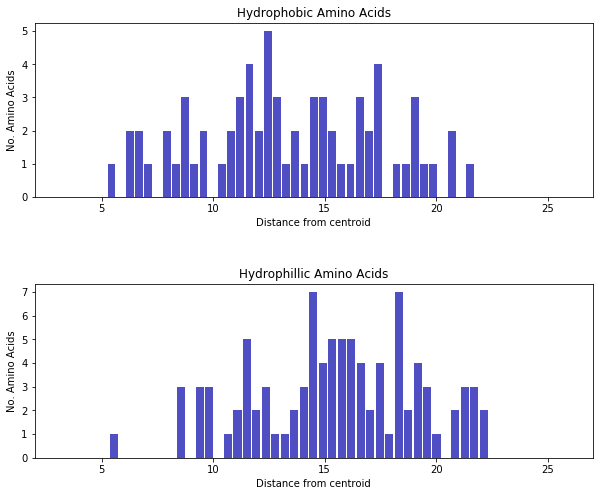

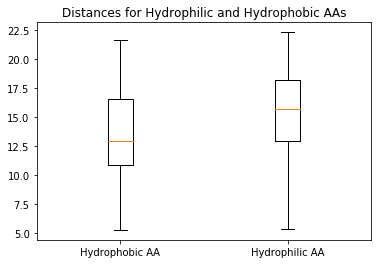

In [8]:
x1 = phob_distances
x2 = phil_distances

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(211)
ax1.hist(x1, bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlim(2, 27)
ax1.set_title('Hydrophobic Amino Acids')
ax1.set_xlabel('Distance from centroid')
ax1.set_ylabel('No. Amino Acids')

ax2 = fig.add_subplot(212)
ax2.hist(x2, bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlim(2, 27)
ax2.set_title('Hydrophillic Amino Acids')
ax2.set_xlabel('Distance from centroid')
ax2.set_ylabel('No. Amino Acids')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.show()

labels = ['Hydrophobic AA', 'Hydrophilic AA']
data = [phob_distances, phil_distances]
fig, ax = plt.subplots()
ax.set_title('Distances for Hydrophilic and Hydrophobic AAs')
ax.boxplot(data, labels = labels)
plt.show()

In [9]:
get_coords(atom_hetero_file, 'phobic')
# xphob = phob_coords[:, 0]
# print(xphob)

phil_coords = get_coords(atom_hetero_file, 'philic')

fig = plt.figure()
ax = fig.gca(projection='3d')

# ax.scatter(xphob, yphob, zphob, lw=0.5)
# ax.set_xlabel("X Axis")
# ax.set_ylabel("Y Axis")
# ax.set_zlabel("Z Axis")
# ax.set_title("Lorenz Attractor")

# plt.show()

In [10]:
atom_file = "atomfile.txt"
hetero_file = "heterofile.txt"

def search_heterogen(filename, hetatom_name):
    coordinates = []
    with open(filename,'r') as infile:
        for line in infile:
            if line[12:16].strip() == hetatom_name:
                coordinates = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                
    return coordinates

search_heterogen(hetero_file, 'FE')

[69.826, -28.42, -11.877]

In [11]:
coords = [69.826, -28.42, -11.877]
def atom_neighbours(filename, input_coords, number):
    coordinates = get_coords(filename)
    distances = []
    dist_coords = []
    output = []
    numbers = (filename)
    
    for coordinate in coordinates:
        distances.append(np.linalg.norm(input_coords-coordinate))
        
    dist_coords_nums = list(zip(distances, coordinates, numbers))
    sorted_dist_coords_nums = sorted(dist_coords_nums)
    
    neighbours = sorted_dist_coords_nums[:number]
    sorted_numbers = [element[2] for element in neighbours]
    
    for element in sorted_numbers:
        with open(filename,'r') as infile:
            for line in infile:
                if (int(line[7:11].strip()) == element):
                    temp = []

                    output_coords = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    temp.append(output_coords)

                    output_number = int(line[7:11].strip())
                    temp.append(output_number)

                    output_residue = line[17:20].strip()
                    temp.append(output_residue)
                    
                    output_resseq = line[22:26].strip()
                    temp.append(output_resseq)

                    output.append(temp)

                    
                
                
    return output

atom_neighbours("atomfile.txt", coords, 5)

[]